# 02- Volatility Modleing S&P 500 Index

In [1]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
from tqdm import tqdm 

import warnings 
warnings.filterwarnings("ignore")

## Read Data

In [2]:
from arch.data import sp500, vix
sp500 = sp500.load()
sp500_prices = sp500["Adj Close"]
returns = sp500_prices.pct_change().dropna()

vix = vix.load().squeeze().dropna()

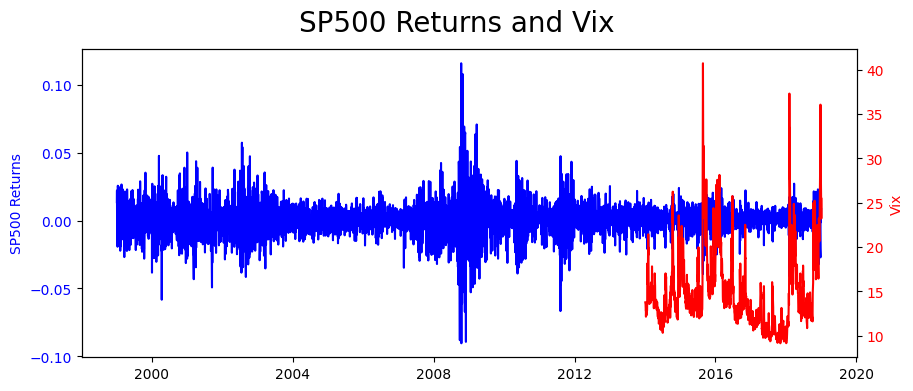

In [3]:
fig, ax1 = plt.subplots(figsize=(10,4))

# First plot
ax1.plot(returns, label='SP500 returns', color='blue')
ax1.set_ylabel('SP500 Returns', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Second plot
ax2 = ax1.twinx()
ax2.plot(vix, label='Vix', color='red')
ax2.set_ylabel('Vix', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Legend and title
fig.suptitle('SP500 Returns and Vix', fontsize=20)

# Show the plot
plt.show()

## PACF of squared returns 

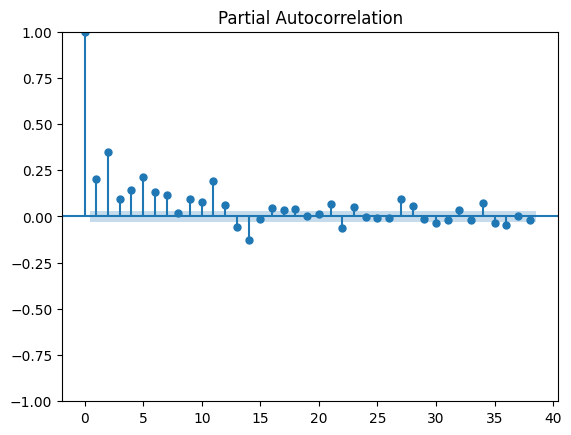

In [4]:
plot_pacf(returns**2)
plt.show()

In [5]:
test_size = 252*5
def rolling_predictions(retruns, p, o, q, test_size = 252*5):
    rolling_predictions = []   

    print('Generate Rolling predictions')
    for i in tqdm(range(test_size)):
        train = returns[:-(test_size-i)]
        model = arch_model(train, p=p, o=o, q=q)
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

    rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-test_size:])    
    return rolling_predictions

def plot_prediction(rolling_predictions, returns, test_size = 252*5):
    plt.figure(figsize=(10,4))
    true, = plt.plot(returns[-test_size:], label='SP500 retruns')
    preds, = plt.plot(rolling_predictions, color='red', label='predicted volatility')
    plt.legend(loc='best')
    plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
    plt.show()

def assess_model(p, o, q):
    model = arch_model(returns, p=p, o=o, q=q)
    model_fit = model.fit(disp='off')
    print(model_fit.summary())
    preds = rolling_predictions(returns, p=p, o=o, q=q)
    plot_prediction(preds, returns)
    return preds

## Test GARCH like models on real data

### Try ARCH

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                15785.4
Distribution:                  Normal   AIC:                          -31546.8
Method:            Maximum Likelihood   BIC:                          -31468.5
                                        No. Observations:                 5030
Date:                Sat, Apr 15 2023   Df Residuals:                     5029
Time:                        14:08:37   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.2878e-04  1.369e-04      3.133  1.730e-03 [1.

100%|██████████| 1260/1260 [01:45<00:00, 11.95it/s]


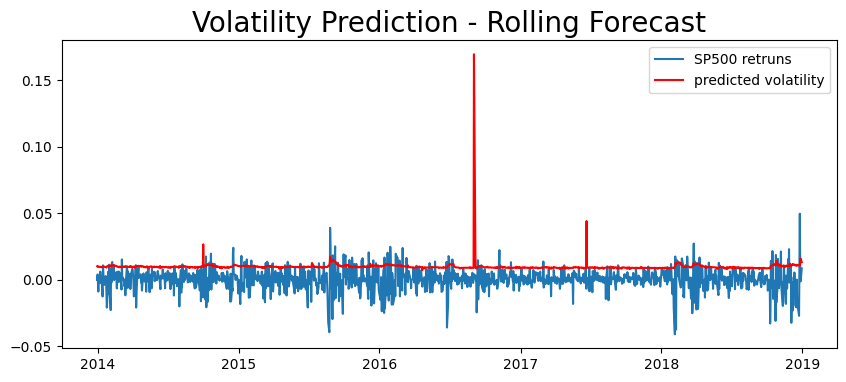

In [6]:
pred_arch_10 = assess_model(p=10, o=0, q=0)

                      Constant Mean - ARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                15635.2
Distribution:                  Normal   AIC:                          -31260.4
Method:            Maximum Likelihood   BIC:                          -31227.8
                                        No. Observations:                 5030
Date:                Sat, Apr 15 2023   Df Residuals:                     5029
Time:                        14:10:22   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         4.0914e-04  1.496e-04      2.736  6.228e-03 [1.

100%|██████████| 1260/1260 [00:22<00:00, 55.51it/s]


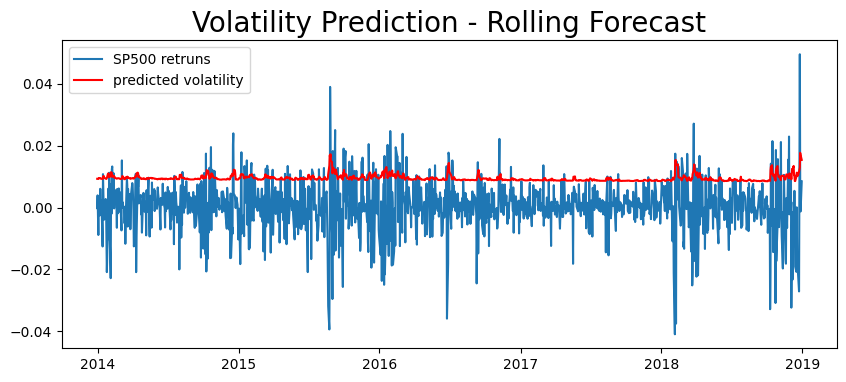

In [7]:
pred_arch = assess_model(p=3, o=0, q=0)

### GARCH(3,3)

                     Constant Mean - GARCH Model Results                      
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                16224.8
Distribution:                  Normal   AIC:                          -32433.6
Method:            Maximum Likelihood   BIC:                          -32381.4
                                        No. Observations:                 5030
Date:                Sat, Apr 15 2023   Df Residuals:                     5029
Time:                        14:10:45   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         5.4558e-04  5.657e-05      9.645  5.180e-22 [4.

100%|██████████| 1260/1260 [00:50<00:00, 25.04it/s]


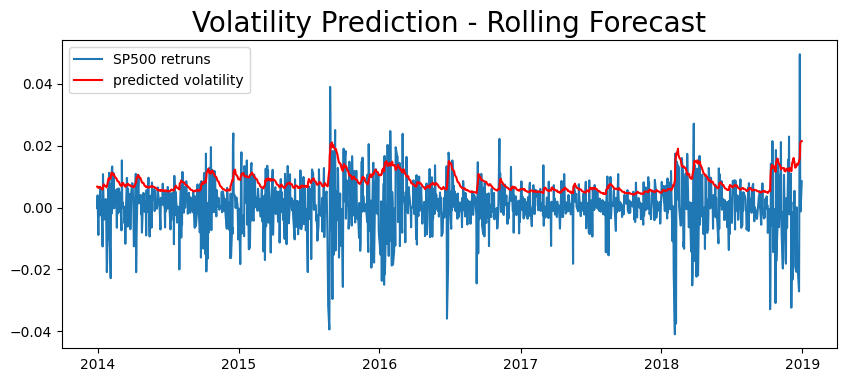

In [8]:
pred_arch = assess_model(p=3, o=0, q=3)

### GJR-GARCH(3, 1, 3)

/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/arch/univariate/base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:                15852.5
Distribution:                  Normal   AIC:                          -31687.0
Method:            Maximum Likelihood   BIC:                          -31628.3
                                        No. Observations:                 5030
Date:                Sat, Apr 15 2023   Df Residuals:                     5029
Time:                        14:12:07   Df Model:                            1
                                  Mean Model                                  
                  coef    std err          t      P>|t|       95.0% Conf. Int.
------------------------------------------------------------------------------
mu         -2.8889e-03  2.164e-02     -0.133      0.

  0%|          | 0/1260 [00:00<?, ?it/s]/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/arch/univariate/base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
  0%|          | 4/1260 [00:00<00:55, 22.47it/s]/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/arch/univariate/base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/home/ubuntu/Documents/Projects/STI_FX_Intervention/.venv/lib/python3.9/site-packages/arch/univariate/base.py:756: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
  1%|          | 7/1260 [00:00<01:10, 17.68it/s]/home/ubuntu

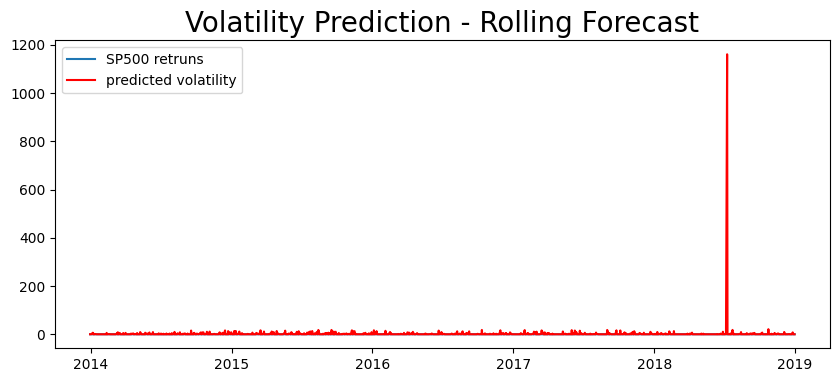

In [12]:
pred_arch = assess_model(p=3, o=1, q=3)

## How to use the model

In [9]:
model = arch_model(returns, p=3, o=2, q=3)
model_fit = model.fit(disp='off')

Text(0.5, 1.0, 'Volatility Prediction - Next 7 Days')

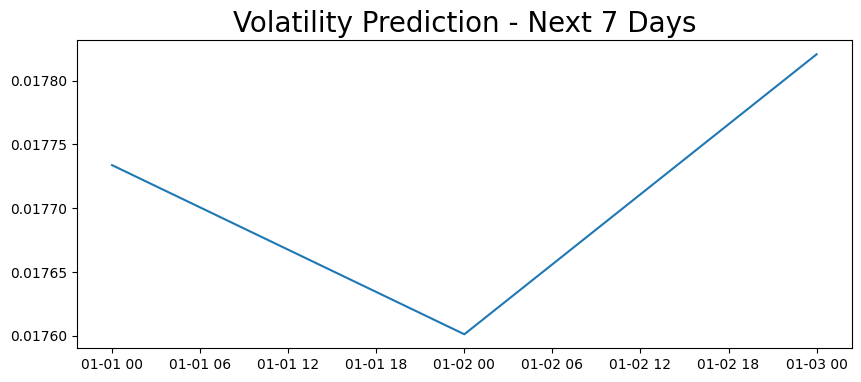

In [13]:
# Generate Next 3 days Prediction
pred = model_fit.forecast(horizon=3)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,4)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

plt.figure(figsize=(10,4))
plt.plot(pred)
plt.title('Volatility Prediction - Next 7 Days', fontsize=20)